# CML

## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [6]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: no se puede crear el directorio «build»: El archivo ya existe
-- The C compiler identification is GNU 9.2.1
-- The CXX compiler identification is GNU 9.2.1
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/martin/.pyenv/versions/tp3/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/martin/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.4.dev4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/martin/Escritorio/Metodos/

In [4]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
!pip3 install matplotlib
!pip3 install seaborn
import cml


/home/martin/Escritorio/Metodos/tp3-metnum/notebooks
Python 3.6.5


In [3]:
import math
import numpy as np
import cml

pol = cml.RegresorPolinomial(5)
pol2 = cml.RegresorLinearYPeriodico()

xi = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

yi = np.array([ 19.18491704,  24.23828237,  25.51696912,  21.132415  ,
        18.51561844,  16.67416831,  21.67937508,  73.86650072,
        27.86581497,  62.24064309,  20.7630102 ,  18.36611344,
        22.2915227 ,  26.67488437,  27.80841453,  28.01734084,
        24.04670171,  20.94918517,  21.61297351,  26.1791079 ,
        30.58041708,  71.66462123,  26.4009197 ,  23.35702282,
        22.81306102,  25.95971466,  31.20989494,  32.92951788,
        29.17522955,  24.83764628, -16.99784805,  27.27351819,
        31.96482778,  32.70960202,  32.97481732,  28.1468845 ,
        27.76968817,  28.30840104,  31.93204413,  35.16472231,
        35.345623  ,  32.01192652,  29.74768432,  28.13694409,
        32.4602434 ,  36.55393194,  35.19061584,  -5.93232767,
        31.67901179,  30.11467335,  33.81246263,  37.30263497,
        39.39935752,  36.35358201,  34.8946213 ,  33.26904689,
        34.89575702,  40.59029904,  -3.19875066,  40.07889426])

degree = 5

matriz = np.stack([xi**j for j in range(degree+1)], axis=1)

pol.fit(matriz, yi)

y_pred = pol.predict([2, 3, 4, 5])

print(y_pred)

m = np.shape(xi)[0]
#xi = [x*2 for x in xi]


#senos = np.stack([np.sin(2*np.pi*xi/(k-1)) for k in range(2, m)], axis=1)

cerosYequis = np.stack([np.ones(m),xi] , axis=1)

#matriz = np.concatenate((cerosYequis, senos), axis =1)

regSenoide = cml.RegresorSenoide()

regSenoide.fit(matriz, yi)

y_pred = regSenoide.predict(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]))



#y_pred = pol.predict([1, 2, 3, 4])
ecm = cml.ecm([1, 2], [3, 4])     # hacer que funcione



[24.13837012 26.18629447 27.84536029 29.15666765]


In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd

#!cd ../data && tar -xvf *.tgz
#!cd ../data && tar -xvf *.tar.gz

df = pd.read_csv("../results/info1998-2008.csv",delimiter=",", index_col=False)

print(df)

print("Cantidad de documentos: {}".format(df.shape[0]))


otps = []

f = open('../results/pruebas_otps.txt', 'w')

cantVuelos = 0
cantDelays = 0
anioActual = 1998
mesActual = 1

for i in range(132):
    if anioActual != df.iloc[i][0].astype(int):
        print(cantVuelos)
        print(cantDelays)
        otps.append([anioActual, (cantDelays/cantVuelos)*100])
        anioActual+=1
        cantVuelos=0
        cantDelays=0
        mesActual=1
    mesActual+=1
    cantVuelos+=df.iloc[i][1]
    cantDelays+=df.iloc[i][2] + df.iloc[i][4]
    
otps.append([anioActual, (cantDelays/(cantVuelos*2))*100])
f.write('{}-{}, {}\n'.format('anio','mes', 'otp'))
    
for otp in otps:
    print(otp)
    f.write('{}, {}\n'.format(otp[0], otp[1]))
    #f.write('{}, {}, {}\n'.format(otp[0], otp[1], otp[2]))

f.close()

print("ok")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     anio  mes  vuelos_totales  atrasos_totales_arribo  \
0    1998    1          452001                  108416   
1    1998    2          412832                   97415   
2    1998    3          459703                  106427   
3    1998    4          442644                   88231   
4    1998    5          449293                   96914   
5    1998    6          446427                  127573   
6    1998    7          462429                   93754   
7    1998    8          465910                  102945   
8    1998    9          443901                   90438   
9    1998   10          457954                   79759   
10   1998   11          436528                   69464   
11   1998   12          455099                  117268   
12   1999    1          453814                  142472   
13   1999    2          417627                   84521   
14   1999    3          466267            

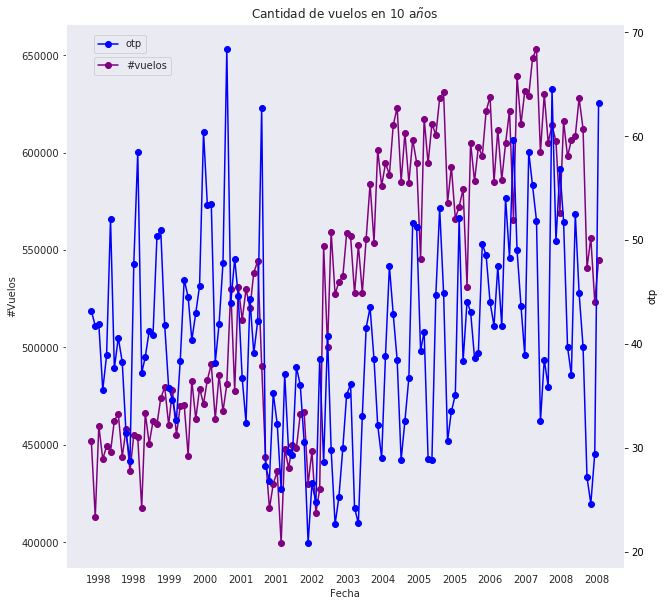

In [7]:
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#import earthpy as et



sns.set_style('dark')
plt.rcParams['figure.figsize'] = (10, 10)


dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m')
fOtps = pd.read_csv("../results/cant_vuelos_mensual.csv",index_col=['fecha'],delimiter=",",parse_dates=['fecha'],date_parser=dateparse)

promedios = pd.read_csv("../results/otps_mensuales_1998_2008.csv", index_col=False,header=0)

#print(fOtps)
#print(fOtps[vuelos_totales])
#print(fOtps.get_loc('vuelos_totales'))
fig,ax = plt.subplots(figsize=(10,10))

#fOtps['vuelos_totales'][0]

ax.plot(fOtps.index.values,
        fOtps[' vuelos_totales'], '-o',
        label='#vuelos',
        color='purple')

ax2 = ax.twinx()

ax2.plot(fOtps.index.values,
         promedios[' otp'], '-o',
         label='otp',
         color='blue')



ax2.set_ylabel('otp', color='black')
ax2.tick_params('y', colors='black')

ax.set(xlabel="Fecha",
       ylabel="#Vuelos",
       title="Cantidad de vuelos en 10 a$\~{n}$os")



ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=40))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))


ax2.legend(bbox_to_anchor=(0.05, 0.98), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(0.05, 0.94), loc='upper left', borderaxespad=0.)




#print(fOtps)
#print(fOtps)

#print(fOtps)



#fOtps.plot('anio','mes','r-')
#fOtps.plot('anio','mes','bo')


#plt.savefig('../graficos/otp_vs_cant_vuelos.png')

In [8]:
RegresorPolinomial
RegresorLinearYPeriodico
RegresorSenoide

Primer eje de estudio:
OTP como indicador de performance. 
En qué o cuáles situaciones se puede confiar en
utilizarlo como métrica de evaluación para predecir futuros problemas de puntualidad.

%Exmperimentos cml



Experimento 0: Génesis 
Experimento por día, mes y año de cml - Ver cual aproximación es mejor.

(Experimento 1  OTP con cml)
Realizar cml para distintos periodos de tiempos año/mes/día y ver cual es el que nos da un menor error.
2002 - 2004  -> 2005 -> 2006 
¿Es posible caracterizar la magnitud de los delays en función del dı́a/mes?
-El mismo mes (DÍA DEL MES) en distintos años tiene similar otp?
¿Qué nivel de granularidad en función del tiempo es conveniente tomar?


SyntaxError: invalid syntax (<ipython-input-8-22a0303fc8b4>, line 5)

In [ ]:
Empiezo con años: 
    Hipótesis: polinomial debería andar bien. Tal vez cuadrática.
    Cantidad de años: 10 años, 11*12meses, 11*12*365 días

In [ ]:
#CML anual

otps_archivo=pd.read_csv("../results/otps_anuales_1998_2008.csv", index_col=False,header=0)

otps_anuales_1998_2007=np.array(otps_archivo[' otp'][0:10])

anios_train=np.arange(1, 11)
anio_2008=11

not_outliers = np.abs(otps_anuales_1998_2007 - otps_anuales_1998_2007.mean()) < 2 * otps_anuales_1998_2007.std()

anios_limpios=anios_train[not_outliers]
otps_limpios=otps_anuales_1998_2007[not_outliers]

m = np.shape(anios_limpios)[0]

grado=1

cerosYequis = np.stack([np.ones(m),anios_limpios] , axis=1)
cerosYequies = np.stack([anios_limpios**j for j in range(grado+1)], axis=1)
senos = np.stack([np.sin(2*np.pi*anios_limpios/(k-1)) for k in range(2,15)], axis=1)

matriz = np.concatenate((cerosYequis, senos), axis =1)


regLineal=cml.RegresorPolinomial(1)
regCosSen=cml.RegresorLinearYPeriodico()
regSenoide=cml.RegresorSenoide()

regLineal.fit(cerosYequis, otps_limpios)
regCosSen.fit(anios_limpios, otps_limpios)
regSenoide.fit(matriz, otps_limpios)

pred_poli = regLineal.predict(cerosYequis, otps_limpios)
pred_Cos_Sen = regCosSen.predict(anios_limpios, otps_limpios)
pred_Senoide = regSenoide.predict(matriz, otps_limpios)



In [ ]:
#Hora de usar cml

#Tomamos año previo. Intentamos predecir año siguiente

otps_archivo=pd.read_csv("../results/otps_anuales_1998_2008.csv", index_col=False,header=0)


#otps_mensuales_1998_2000=np.array(otps_archivo[' otp'][:36])


#Mensuales
otps_mensuales_2002_2004=np.array(otps_archivo[' otp'][48:84])
otps_mensuales_2005_2006=np.array(otps_archivo[' otp'][84:108])



otps_anuales_1999_2008=np.array(otps_archivo[' otp'])


#segundo_anio=np.array(otps_archivo[' otp'][12:24])
#tercer_anio=np.array(otps_archivo[' otp'][24:36])

#sumas=otps_mensuales_1998+segundo_anio+tercer_anio

#sumas/=3

meses_train=np.arange(1,37)
meses_test=np.arange(37,61)

not_outliers = np.abs(otps_mensuales_2002_2004 - otps_mensuales_2002_2004.mean()) < 2 * otps_mensuales_2002_2004.std()


meses_limpios=meses_train[not_outliers]
otps_limpios=otps_mensuales_2002_2004[not_outliers]


"""############Ajuste polinomial####################"""

regPoli = cml.RegresorPolinomial(2)

regPoli.fit(meses_limpios, otps_limpios)

y_pred_pol = regPoli.predict(meses_limpios)


ecmPol=cml.ecm(y_pred_pol, otps_limpios)

"""############Ajuste periodico####################"""

regPeriod=cml.RegresorLinearYPeriodico()

regPeriod.fit(meses_limpios, otps_limpios)

y_pred_period=regPeriod.predict(meses_limpios)

#print(y_pred_period)

"""##############Ajuste senoide#####################"""

#print(meses_limpios)

m = np.shape(meses_limpios)[0]


senos = np.stack([np.sin(2*np.pi*meses_limpios/(k-1)) for k in range(2,15)], axis=1)

print(m)


cerosYequis = np.stack([np.ones(m),meses_limpios] , axis=1)


matriz = np.concatenate((cerosYequis, senos), axis =1)


regSenoide = cml.RegresorSenoide()

regSenoide.fit(matriz, otps_limpios)

#print(regSenoide.mostrarCoefs())

y_pred_senoide = regSenoide.predict(meses_test)


"""############################################################"""

recmPeriod=cml.ecm(y_pred_period, otps_limpios)

recmSenoide=cml.ecm(y_pred_senoide, otps_limpios)

#print(y_pred_period, y_pred_senoide)

print(recmPeriod, recmSenoide)

#print(y_pred_senoide)

#plt.plot(meses_limpios, otps_limpios,'b.')
#plt.plot(meses_limpios, y_pred_senoide,'r-')


plt.plot(meses_test, otps_mensuales_2005_2006,'b.')
plt.plot(meses_test, y_pred_senoide,'r-')



In [ ]:
df.describe()

In [ ]:
text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


In [ ]:
print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

In [ ]:
import sentiment

clf = sentiment.KNNClassifier(100)

clf.fit(X_train, y_train)


In [ ]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))